In [1]:
#!pip install keras_tuner

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import os
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread


from sklearn.model_selection import train_test_split


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler , OneHotEncoder

from keras.layers.core import Dense
from keras.layers import Dropout
from tensorflow import keras
from keras.models import Sequential
from keras import regularizers
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
import keras_tuner as kt
from time import time
import warnings
warnings.filterwarnings("ignore")

# Part I: Data Preparation

In [3]:
df = pd.read_csv("train.csv",index_col='id')

Describe the data


In [4]:
df

species   margin1   margin2   margin3   margin4   margin5  \
id                                                                              
1               Acer_Opalus  0.007812  0.023438  0.023438  0.003906  0.011719   
2     Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625  0.025391   
3      Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812  0.003906   
5           Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859  0.021484   
6        Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766  0.013672   
...                     ...       ...       ...       ...       ...       ...   
1575   Magnolia_Salicifolia  0.060547  0.119140  0.007812  0.003906  0.000000   
1578            Acer_Pictum  0.001953  0.003906  0.021484  0.107420  0.001953   
1581     Alnus_Maximowiczii  0.001953  0.003906  0.000000  0.021484  0.078125   
1582          Quercus_Rubra  0.000000  0.000000  0.046875  0.056641  0.009766   
1584         Quercus_Afares  0.023438  0.019531  0.031250  0.015625  0.005859   

       margin6   margin7  margin8   margin9  ...  texture55  texture56  \
id                                           ...                         
1     0.009766  0.027344      0.0  0.001953  ...   0.007812   0.000000   
2     0.001953  0.019531      0.0  0.000000  ...   0.000977   0.000000   
3     0.005859  0.068359      0.0  0.000000  ...   0.154300   0.000000   
5     0.019531  0.023438      0.0  0.013672  ...   0.000000   0.000977   
6     0.015625  0.005859      0.0  0.000000  ...   0.096680   0.000000   
...        ...       ...      ...       ...  ...        ...        ...   
1575  0.148440  0.017578      0.0  0.001953  ...   0.242190   0.000000   
1578  0.000000  0.000000      0.0  0.029297  ...   0.170900   0.000000   
1581  0.003906  0.007812      0.0  0.003906  ...   0.004883   0.000977   
1582  0.000000  0.000000      0.0  0.037109  ...   0.083008   0.030273   
1584  0.019531  0.035156      0.0  0.003906  ...   0.000000   0.000000   

      texture57  texture58  texture59  texture60  texture61  texture62  \
id                                                                       
1      0.002930   0.002930   0.035156   0.000000   0.000000   0.004883   
2      0.000000   0.000977   0.023438   0.000000   0.000000   0.000977   
3      0.005859   0.000977   0.007812   0.000000   0.000000   0.000000   
5      0.000000   0.000000   0.020508   0.000000   0.000000   0.017578   
6      0.021484   0.000000   0.000000   0.000000   0.000000   0.000000   
...         ...        ...        ...        ...        ...        ...   
1575   0.034180   0.000000   0.010742   0.000000   0.000000   0.000000   
1578   0.018555   0.000000   0.011719   0.000000   0.000000   0.000977   
1581   0.004883   0.027344   0.016602   0.007812   0.000000   0.027344   
1582   0.000977   0.002930   0.014648   0.000000   0.041992   0.000000   
1584   0.002930   0.000000   0.012695   0.000000   0.000000   0.023438   

      texture63  texture64  
id                          
1      0.000000   0.025391  
2      0.039062   0.022461  
3      0.020508   0.002930  
5      0.000000   0.047852  
6      0.000000   0.031250  
...         ...        ...  
1575   0.000000   0.018555  
1578   0.000000   0.021484  
1581   0.000000   0.001953  
1582   0.001953   0.002930  
1584   0.025391   0.022461  

[990 rows x 193 columns]

In [5]:
df.describe()

margin1     margin2     margin3     margin4     margin5     margin6  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.017412    0.028539    0.031988    0.023280    0.014264    0.038579   
std      0.019739    0.038855    0.025847    0.028411    0.018390    0.052030   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.001953    0.001953    0.013672    0.005859    0.001953    0.000000   
50%      0.009766    0.011719    0.025391    0.013672    0.007812    0.015625   
75%      0.025391    0.041016    0.044922    0.029297    0.017578    0.056153   
max      0.087891    0.205080    0.156250    0.169920    0.111330    0.310550   

          margin7     margin8     margin9    margin10  ...   texture55  \
count  990.000000  990.000000  990.000000  990.000000  ...  990.000000   
mean     0.019202    0.001083    0.007167    0.018639  ...    0.036501   
std      0.017511    0.002743    0.008933    0.016071  ...    0.063403   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.005859    0.000000    0.001953    0.005859  ...    0.000000   
50%      0.015625    0.000000    0.005859    0.015625  ...    0.004883   
75%      0.029297    0.000000    0.007812    0.027344  ...    0.043701   
max      0.091797    0.031250    0.076172    0.097656  ...    0.429690   

        texture56   texture57   texture58   texture59   texture60   texture61  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.005024    0.015944    0.011586    0.016108    0.014017    0.002688   
std      0.019321    0.023214    0.025040    0.015335    0.060151    0.011415   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000977    0.000000    0.004883    0.000000    0.000000   
50%      0.000000    0.005859    0.000977    0.012695    0.000000    0.000000   
75%      0.000000    0.022217    0.009766    0.021484    0.000000    0.000000   
max      0.202150    0.172850    0.200200    0.106450    0.578130    0.151370   

        texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  
mean     0.020291    0.008989    0.019420  
std      0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000977  
50%      0.003906    0.002930    0.011719  
75%      0.023438    0.012695    0.029297  
max      0.375980    0.086914    0.141600  

[8 rows x 192 columns]

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

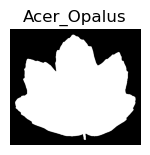

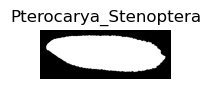

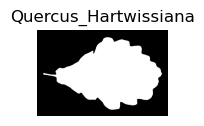

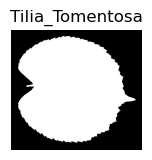

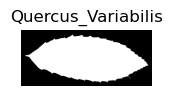

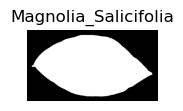

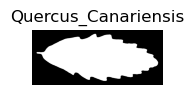

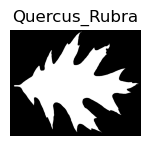

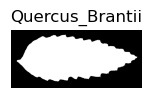

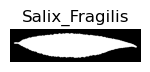

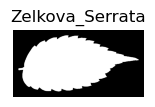

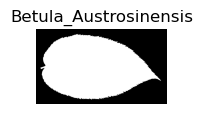

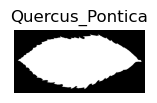

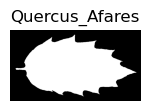

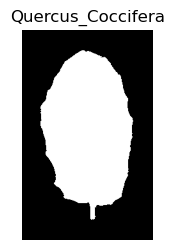

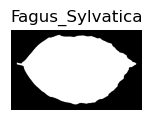

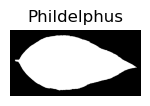

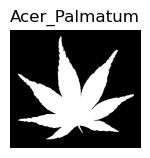

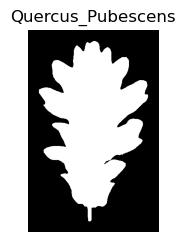

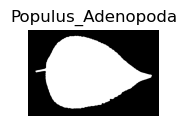

In [8]:
def load_images_from_folder():
    counter = 1
    images = []
    for i in range(len(df.index)):
            images.append(f'images/{df.index[i]}.jpg')
    return images

images = load_images_from_folder()
for i in range(20):
    fig = plt.figure(figsize=(40,30))
    a=fig.add_subplot(1,20,i+1)
    image = imread(images[i])
    imshow(image,cmap='Greys_r',aspect="equal")
    plt.title(df.loc[df.index[i], 'species'])
    axis('off')

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap="RdBu_r")

In [10]:
result = df["species"].value_counts()
print(result)

Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64


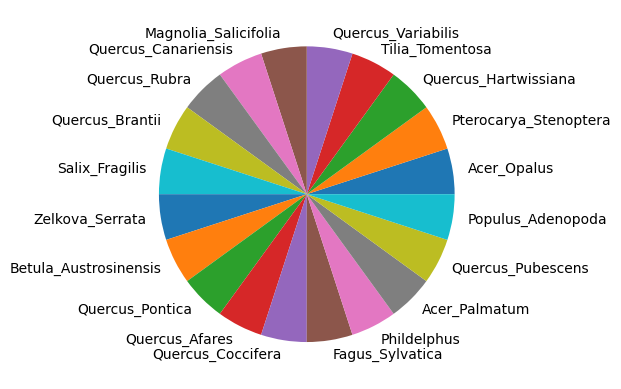

In [11]:
plt.pie(df[:20]['species'].value_counts(),labels=df['species'][:20]);

In [12]:
df["species"] =df.groupby("species", sort=False).ngroup()

In [13]:
result = df["species"].value_counts()
print(result)

0     10
74    10
72    10
71    10
70    10
      ..
30    10
29    10
28    10
27    10
98    10
Name: species, Length: 99, dtype: int64


In [14]:
df

species   margin1   margin2   margin3   margin4   margin5   margin6  \
id                                                                          
1           0  0.007812  0.023438  0.023438  0.003906  0.011719  0.009766   
2           1  0.005859  0.000000  0.031250  0.015625  0.025391  0.001953   
3           2  0.005859  0.009766  0.019531  0.007812  0.003906  0.005859   
5           3  0.000000  0.003906  0.023438  0.005859  0.021484  0.019531   
6           4  0.005859  0.003906  0.048828  0.009766  0.013672  0.015625   
...       ...       ...       ...       ...       ...       ...       ...   
1575        5  0.060547  0.119140  0.007812  0.003906  0.000000  0.148440   
1578       57  0.001953  0.003906  0.021484  0.107420  0.001953  0.000000   
1581       55  0.001953  0.003906  0.000000  0.021484  0.078125  0.003906   
1582        7  0.000000  0.000000  0.046875  0.056641  0.009766  0.000000   
1584       13  0.023438  0.019531  0.031250  0.015625  0.005859  0.019531   

       margin7  margin8   margin9  ...  texture55  texture56  texture57  \
id                                 ...                                    
1     0.027344      0.0  0.001953  ...   0.007812   0.000000   0.002930   
2     0.019531      0.0  0.000000  ...   0.000977   0.000000   0.000000   
3     0.068359      0.0  0.000000  ...   0.154300   0.000000   0.005859   
5     0.023438      0.0  0.013672  ...   0.000000   0.000977   0.000000   
6     0.005859      0.0  0.000000  ...   0.096680   0.000000   0.021484   
...        ...      ...       ...  ...        ...        ...        ...   
1575  0.017578      0.0  0.001953  ...   0.242190   0.000000   0.034180   
1578  0.000000      0.0  0.029297  ...   0.170900   0.000000   0.018555   
1581  0.007812      0.0  0.003906  ...   0.004883   0.000977   0.004883   
1582  0.000000      0.0  0.037109  ...   0.083008   0.030273   0.000977   
1584  0.035156      0.0  0.003906  ...   0.000000   0.000000   0.002930   

      texture58  texture59  texture60  texture61  texture62  texture63  \
id                                                                       
1      0.002930   0.035156   0.000000   0.000000   0.004883   0.000000   
2      0.000977   0.023438   0.000000   0.000000   0.000977   0.039062   
3      0.000977   0.007812   0.000000   0.000000   0.000000   0.020508   
5      0.000000   0.020508   0.000000   0.000000   0.017578   0.000000   
6      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
...         ...        ...        ...        ...        ...        ...   
1575   0.000000   0.010742   0.000000   0.000000   0.000000   0.000000   
1578   0.000000   0.011719   0.000000   0.000000   0.000977   0.000000   
1581   0.027344   0.016602   0.007812   0.000000   0.027344   0.000000   
1582   0.002930   0.014648   0.000000   0.041992   0.000000   0.001953   
1584   0.000000   0.012695   0.000000   0.000000   0.023438   0.025391   

      texture64  
id               
1      0.025391  
2      0.022461  
3      0.002930  
5      0.047852  
6      0.031250  
...         ...  
1575   0.018555  
1578   0.021484  
1581   0.001953  
1582   0.002930  
1584   0.022461  

[990 rows x 193 columns]

In [15]:
X_train, X_val, y_train, y_val = train_test_split(df.drop('species',axis = 1),df["species"],stratify=df["species"],test_size = 0.2,random_state=1)

In [16]:
X_train.shape

(792, 192)

# Part II: Training a neural network

In [17]:
keras.backend.clear_session()  #removing weights

def create_MLP(hp):
  #learning rate
    LR = hp.Float('learning_rate',min_value=1e-4,max_value=0.1,sampling='log')
  #hidden units number
    hidden_neurons = hp.Int('hidden_units',min_value=32,max_value=512,step=32)
  #dropout rate
    hidden_dropout =  hp.Float('hidden_dropout',min_value=0.0,max_value=0.5,default=0.25,step=0.05)
  #l1 reguralization
    l1_penalty_hidden = hp.Float('l1_penalty_hidden',min_value=0.0,max_value=0.01,default=0.0,step=0.0015)
  #l2 reguralization
    l2_penalty_hidden = hp.Float('l2_penalty_hidden',min_value=0.0,max_value=0.01,default=0.0,step=0.0015)
  #l2 reguralization for hidden layer bias
    l2_penalty_hidden_bias = hp.Float('l2_penalty_hidden_bias',min_value=0.0,max_value=0.01,default=0.0,step=0.0015)
  
  #creating model
    MLP = Sequential()
    MLP.add(Dense(units=hidden_neurons,input_dim=192,kernel_regularizer=regularizers.l1_l2(l1=l1_penalty_hidden, l2=l2_penalty_hidden),
                  bias_regularizer=regularizers.l2(l2_penalty_hidden_bias), activation='tanh'))#input + hidden layer
    MLP.add(Dropout(rate = hidden_dropout))   # dropout layer
    MLP.add(Dense(99, activation='softmax'))   #Output layer
    optimizer = Adam(learning_rate=LR)
    MLP.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])   #multiclass
    MLP.build(X_train.shape)
    print(MLP.summary())
    return MLP

In [18]:
#The overwrite=True parameter in the KerasTuner constructor is used to indicate that the tuner should start a new search and ignore any previous results
tuner = kt.Hyperband(create_MLP,objective='val_accuracy',max_epochs=300,overwrite = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                6176      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 99)                3267      
                                                                 
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
#callback function that stops the training of a neural network model when a monitored metric has stopped improving
#patience parameter is the number of epochs with no improvement after which training will be stopped
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

In [20]:
#search for best hyperparameters to find best validation accuracy
#use_multiprocessing=True and workers=5 indicate that the generator is run in parallel to the model with 6 processes.
tuner.search(X_train, y_train, epochs=300, validation_data=(X_val,y_val), use_multiprocessing=True, workers=5, callbacks=[early_stop])

# Get the optimal hyperparameters after finishing the search
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0] #get the number 1 best hyperparametes

print("\t\t\t\t\t\tThe best hyperparameters search is complete.\n")
print(f"The optimal number of units in the hidden layer is {best_hps.get('hidden_units')}, the best dropout in this layer is {best_hps.get('hidden_dropout')}, best L1 and L2 regulaizers values are ({best_hps.get('l1_penalty_hidden')},{best_hps.get('l2_penalty_hidden')},{best_hps.get('l2_penalty_hidden_bias')}).")
print(f"the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")

Trial 725 Complete [00h 00m 16s]
val_accuracy: 0.14646464586257935

Best val_accuracy So Far: 0.9797979593276978
Total elapsed time: 01h 23m 24s
INFO:tensorflow:Oracle triggered exit
						The best hyperparameters search is complete.

The optimal number of units in the hidden layer is 32, the best dropout in this layer is 0.4, best L1 and L2 regulaizers values are (0.0,0.0,0.009000000000000001).
the optimal learning rate for the optimizer is 0.042225643622824015.


In [21]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
learning_rate: 0.042225643622824015
hidden_units: 32
hidden_dropout: 0.4
l1_penalty_hidden: 0.0
l2_penalty_hidden: 0.0
l2_penalty_hidden_bias: 0.009000000000000001
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 5
tuner/round: 3
tuner/trial_id: 0384
Score: 0.9797979593276978
Trial summary
Hyperparameters:
learning_rate: 0.042225643622824015
hidden_units: 32
hidden_dropout: 0.4
l1_penalty_hidden: 0.0
l2_penalty_hidden: 0.0
l2_penalty_hidden_bias: 0.009000000000000001
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 5
tuner/round: 4
tuner/trial_id: 0411
Score: 0.9797979593276978
Trial summary
Hyperparameters:
learning_rate: 0.018093073752393517
hidden_units: 352
hidden_dropout: 0.05
l1_penalty_hidden: 0.0
l2_penalty_hidden: 0.0
l2_penalty_hidden_bias: 0.0075
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 5
tuner/round: 4
tuner/trial_id: 0412
Score: 0.9797979593276

In [31]:
# Get the optimal 10 hyperparameters after finishing the search
best_hps=tuner.get_best_hyperparameters(num_trials=36)[:]

best_hidden_units = []
best_learning_rates = []
best_hidden_l2 = []
best_hidden_l1 = []
best_hidden_l2_bias = []
best_dropout_rate = []
for i in range(36):
    best_hidden_units.append(best_hps[i].get('hidden_units'))
    best_learning_rates.append(best_hps[i].get('learning_rate'))
    best_hidden_l2.append(best_hps[i].get('l2_penalty_hidden'))
    best_hidden_l1.append(best_hps[i].get('l1_penalty_hidden'))
    best_hidden_l2_bias.append(best_hps[i].get('l2_penalty_hidden_bias'))
    best_dropout_rate.append(best_hps[i].get('hidden_dropout'))
#     best_score.append(best_hps[i].get('Score'))

best_hps = pd.DataFrame({'Learning rate':best_learning_rates, 
                            'Best hidden units number':best_hidden_units,
                            'Best hidden units L2':best_hidden_l2,
                            'Best hidden L1':best_hidden_l1,
                            'Best hidden L2 bias':best_hidden_l2_bias,
                            'Best Dropout Rate':best_dropout_rate})
#                             'Best Score':best_score})

best_hps.drop_duplicates(inplace=True)
best_hps.reset_index(drop=True,inplace=True)
best_hps

Learning rate  Best hidden units number  Best hidden units L2  \
0        0.042226                        32                0.0000   
1        0.018093                       352                0.0000   
2        0.007257                       352                0.0000   
3        0.019484                       256                0.0000   
4        0.030705                        32                0.0000   
5        0.002738                       384                0.0000   
6        0.004226                       288                0.0000   
7        0.067424                        64                0.0000   
8        0.020427                        64                0.0000   
9        0.046068                       352                0.0000   
10       0.029240                        64                0.0000   
11       0.006836                       224                0.0015   

    Best hidden L1  Best hidden L2 bias  Best Dropout Rate  
0           0.0000               0.0090               0.40  
1           0.0000               0.0075               0.05  
2           0.0000               0.0000               0.15  
3           0.0000               0.0030               0.15  
4           0.0000               0.0015               0.15  
5           0.0000               0.0090               0.40  
6           0.0000               0.0015               0.30  
7           0.0000               0.0030               0.20  
8           0.0015               0.0090               0.05  
9           0.0000               0.0000               0.25  
10          0.0015               0.0000               0.10  
11          0.0000               0.0045               0.10

In [32]:
def build_model(best_values):
    """
    function to build a sequential neural network

    Parameters:

    hidden_units (int): number of hidden units in your neural network
    learning_rate (float or int): value of learning rate that will help model to convergence
    dropout (float): value of dropout in the hidden layer
    L1 (float): value of lasso regularizer of hidden units weights
    L2 (float): value of ridge regularizer of hidden units weights
    L2_bias: value of ridge regularizer of hidden units bias

    Return:

    your model
    """
    keras.backend.clear_session()
    ANN = Sequential()
    ANN.add(Dense(units=best_values[1],input_dim=X_train.shape[1],kernel_regularizer=regularizers.l1_l2(l1=best_values[3], l2=best_values[2]),bias_regularizer=regularizers.l2(best_values[4]), activation='tanh'))
    ANN.add(Dropout(rate = best_values[5]))
    ANN.add(Dense(99, activation='softmax'))
    optimizer = Adam(learning_rate=best_values[0])
    ANN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    ANN.build(X_train.shape)
    return ANN

In [33]:
def train_all_models(models):

    early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
    for i in range(len(models)):
        keras.backend.clear_session()
        history = models[i].fit(X_train, y_train, epochs=300,batch_size = 64, validation_data=(X_val,y_val),callbacks=[early_stop],verbose = 0)
        val_loss_per_epoch = history.history['val_loss']
        loss_per_epoch = history.history['loss']
        val_accuracy_per_epoch = history.history['val_accuracy']
        accuracy_per_epoch = history.history['accuracy']
        plt.figure(figsize=(8,8))
        plt.title(f"model number {i+1} training loss & validation")
        plt.xlabel('epoch')
        plt.ylabel('loss function')
        plt.plot(np.arange(1,len(val_loss_per_epoch)+1),val_loss_per_epoch,label="validation loss")
        plt.plot(np.arange(1,len(loss_per_epoch)+1),loss_per_epoch,label = "training loss")
        plt.legend(loc="upper left")
        plt.show()
        plt.figure(figsize=(8,8))
        plt.title(f"model number {i+1} training accuracy & validation accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.plot(np.arange(1,len(val_accuracy_per_epoch)+1),val_accuracy_per_epoch,label="validation accuracy")
        plt.plot(np.arange(1,len(accuracy_per_epoch)+1),accuracy_per_epoch,label = "training accuracy")
        plt.legend(loc="upper left")
        plt.show()

In [34]:
def evaluate_model(models,X_tr,X_val,y_tr,y_val):
    training_loss = []
    validation_loss =[]
    training_accuracy = []
    validation_accuracy = []
    #get the training and validation loss/accuracy for best 12 models
    for i in range(len(models)):
        keras.backend.clear_session()
        training_accuracy.append(models[i].evaluate(X_tr, y_tr)[0])
        validation_accuracy.append(models[i].evaluate(X_val,y_val)[0])
    return training_loss, validation_loss, training_accuracy, validation_accuracy

In [35]:
def createBest_12Models(best_hyperparameters):
    models = []
    for i in range(len(best_hyperparameters)):
        models.append(build_model(best_hyperparameters.iloc[i]))
    return models

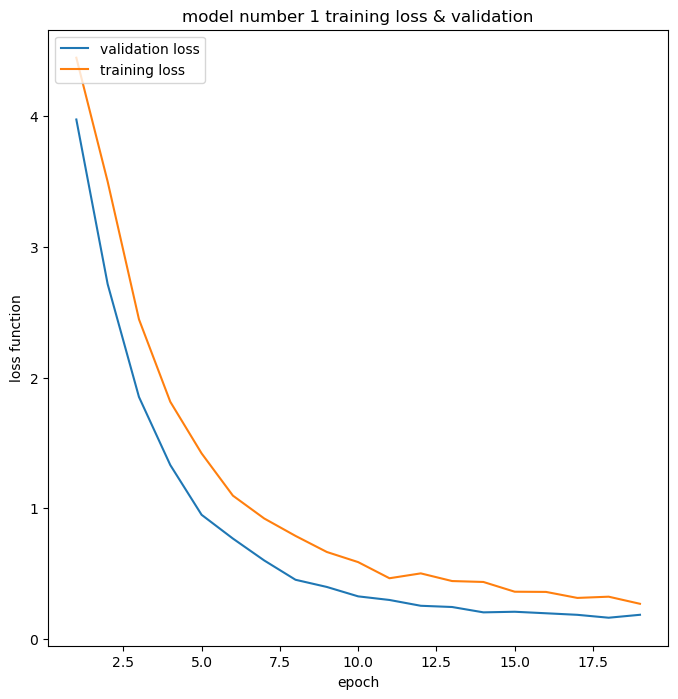

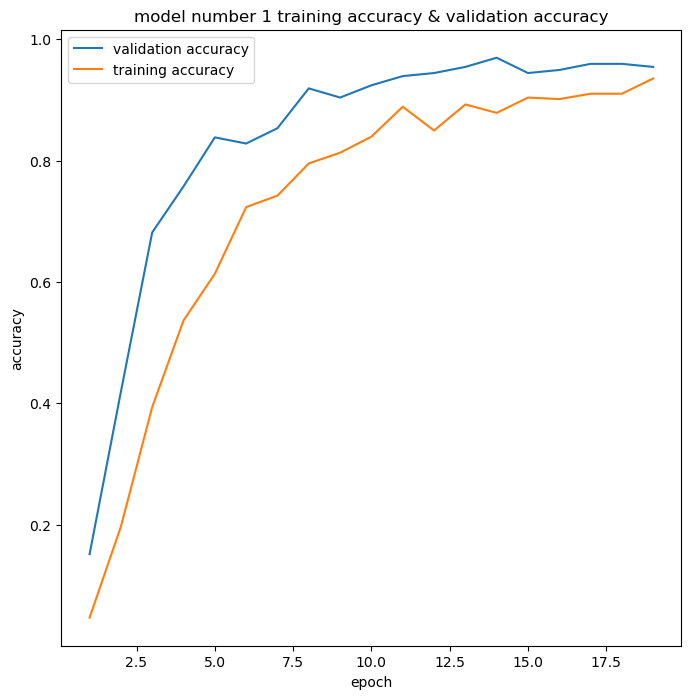

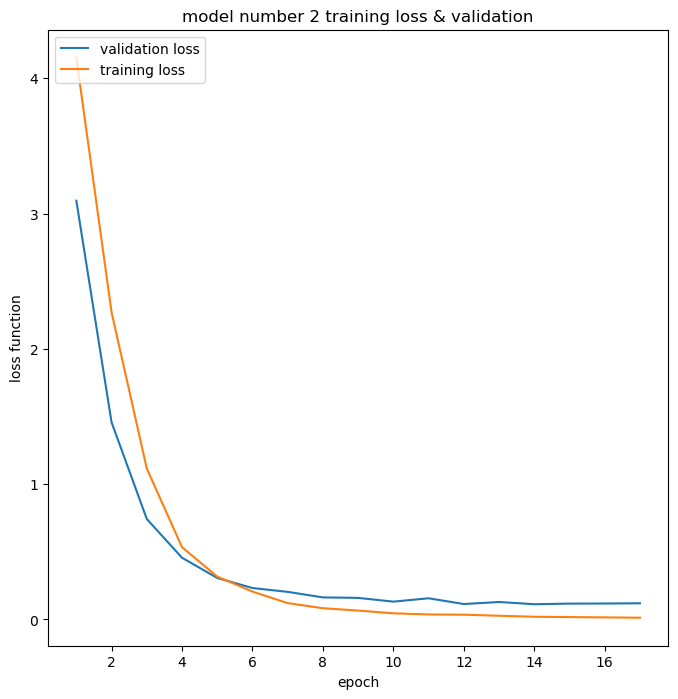

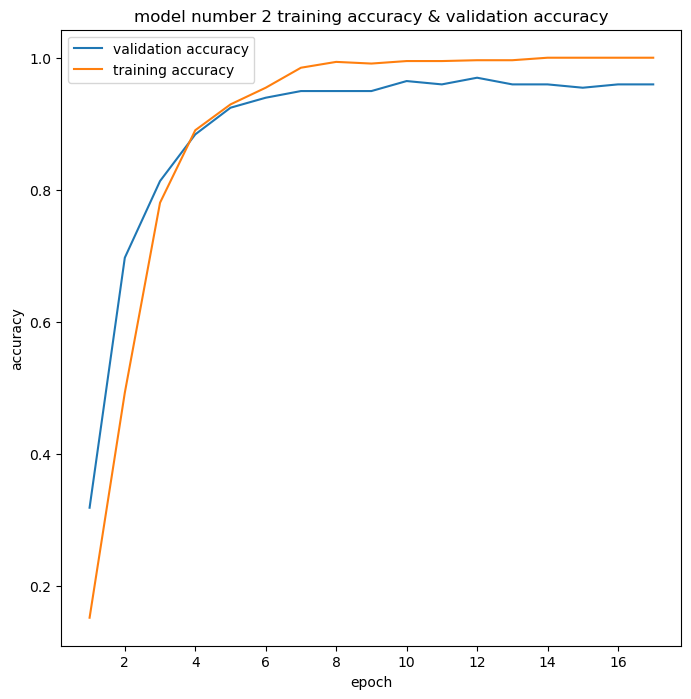

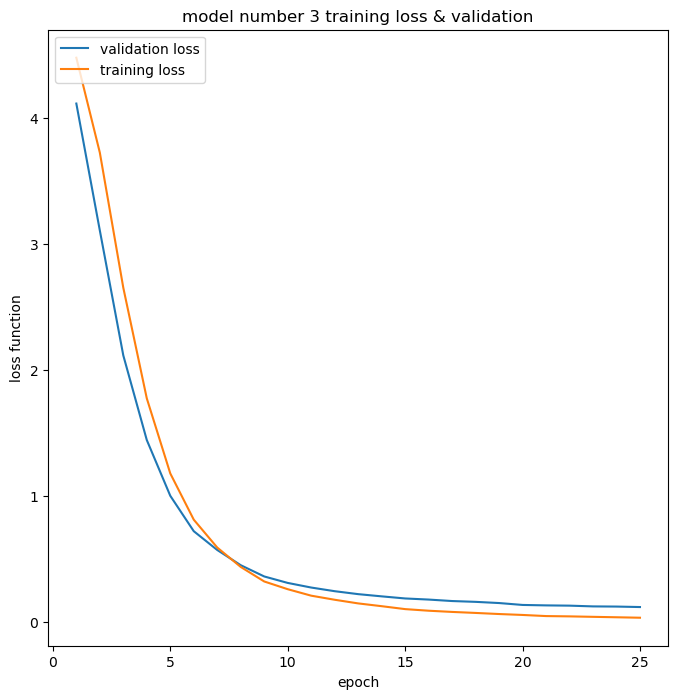

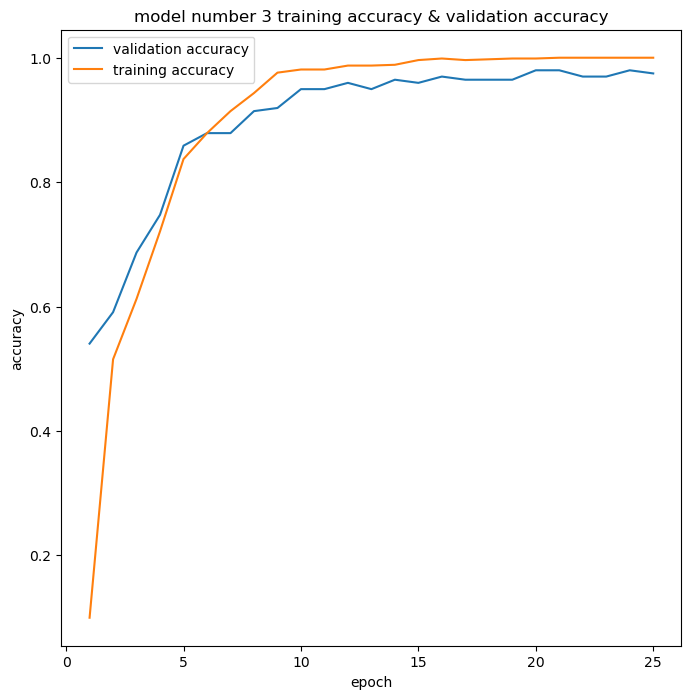

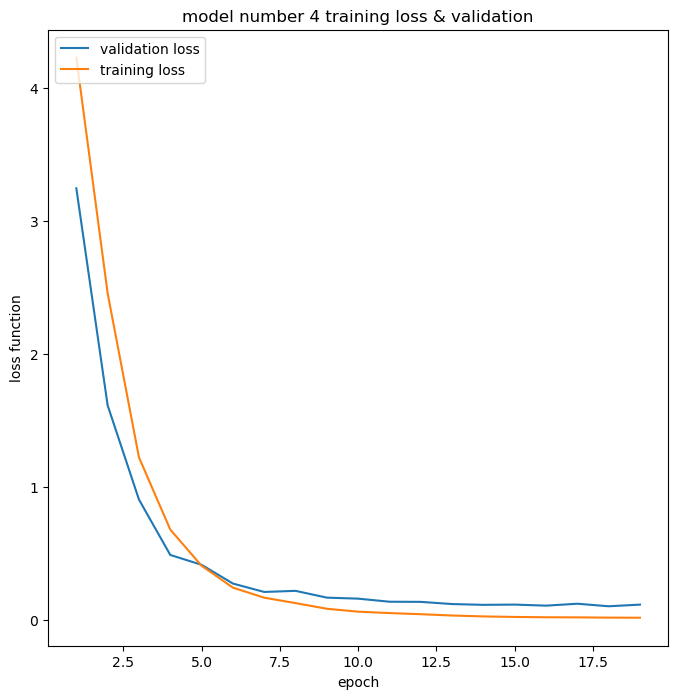

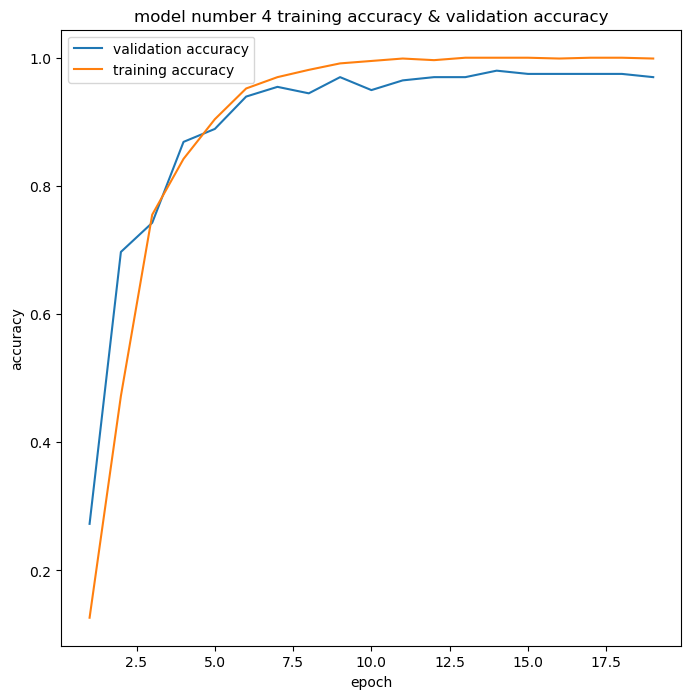

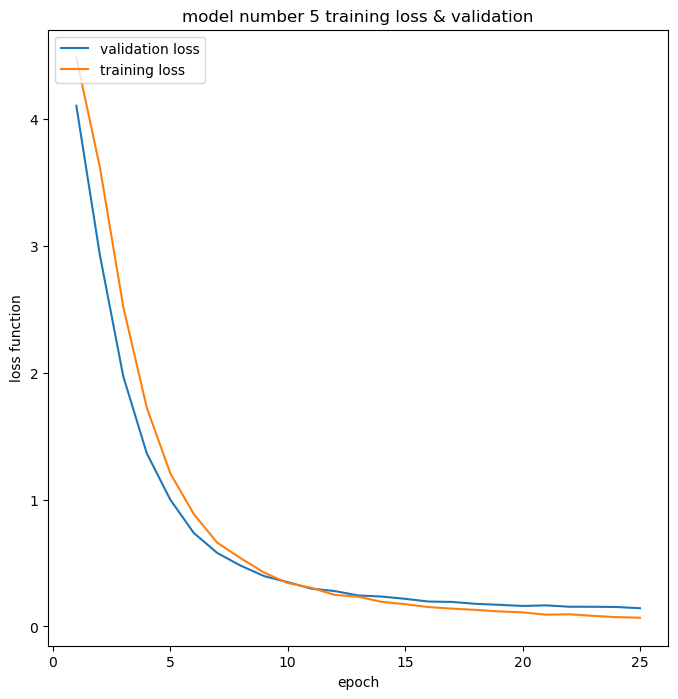

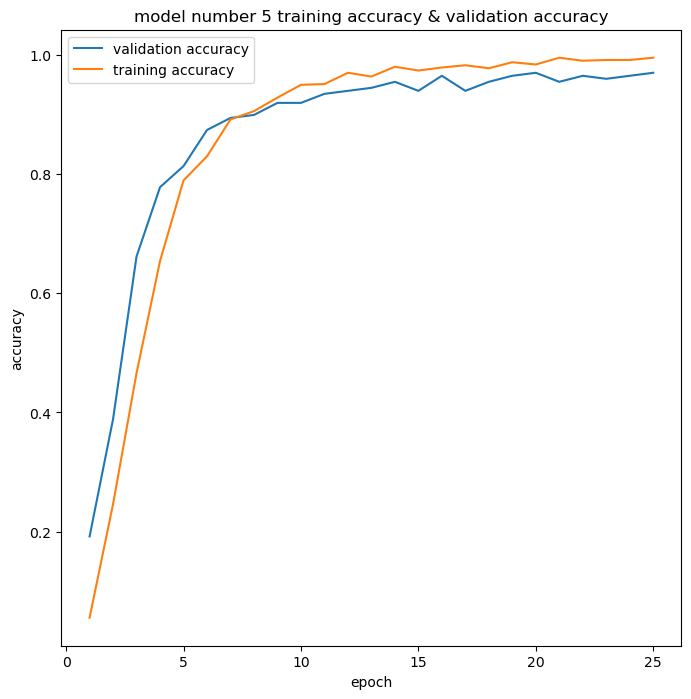

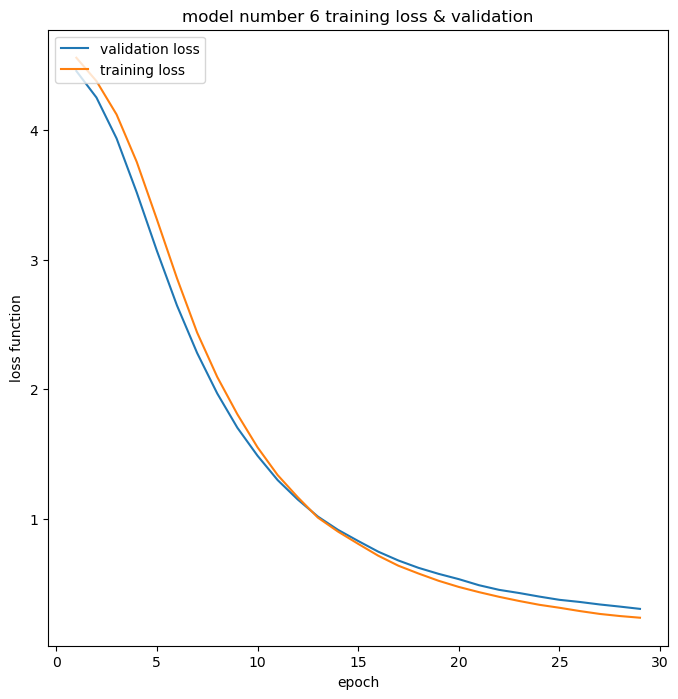

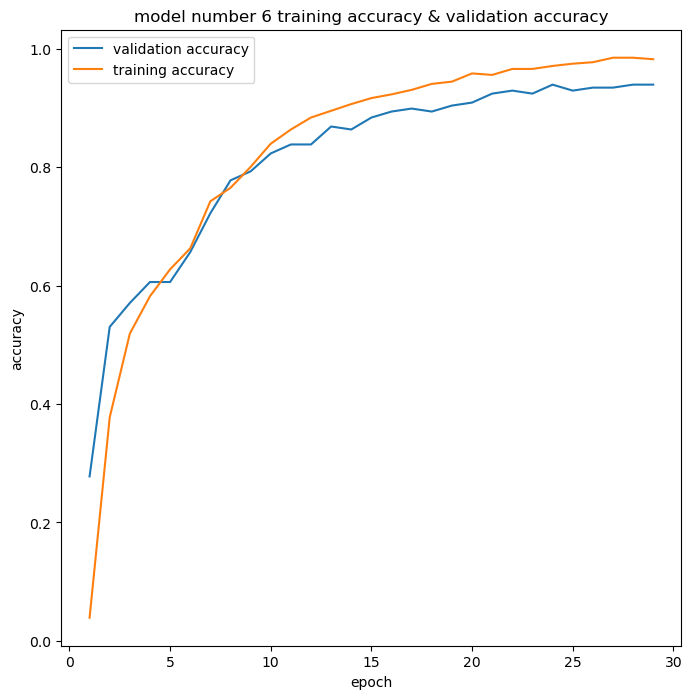

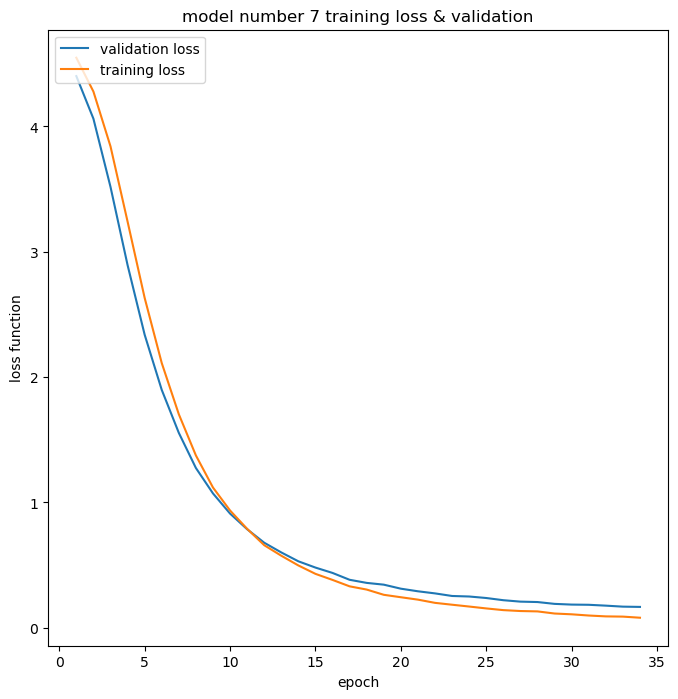

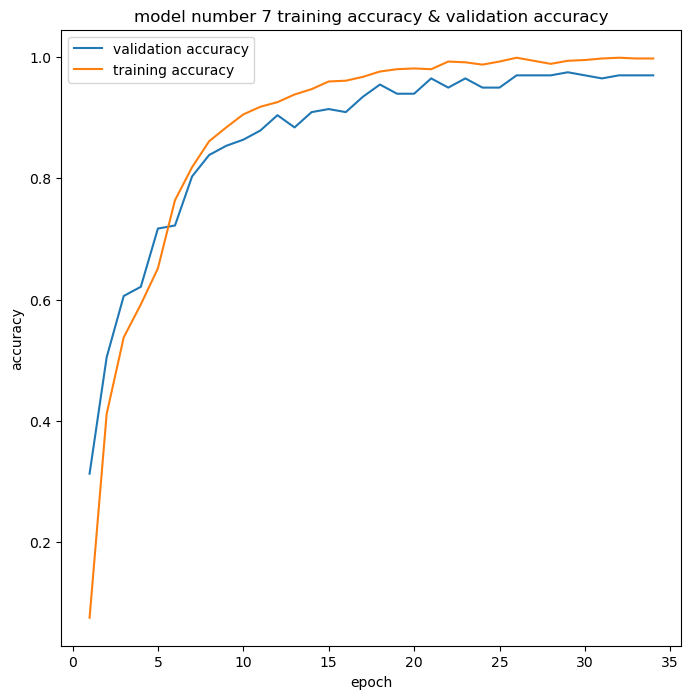

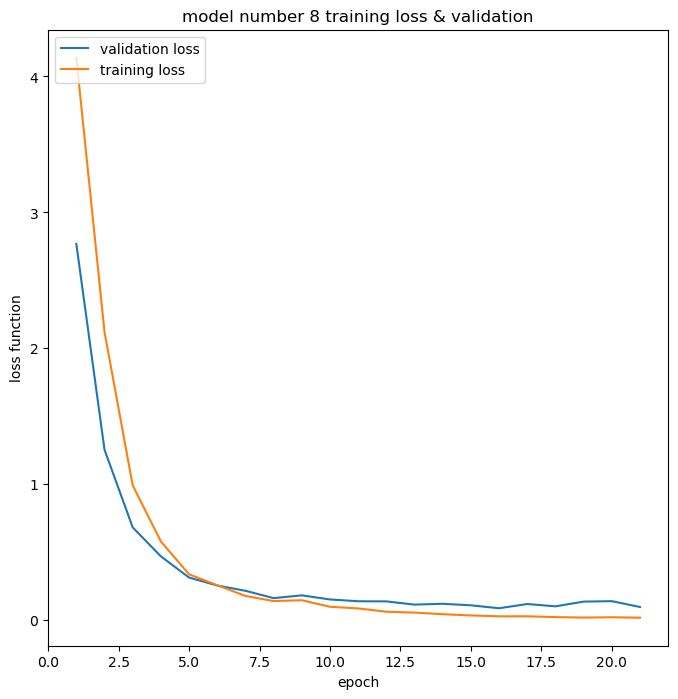

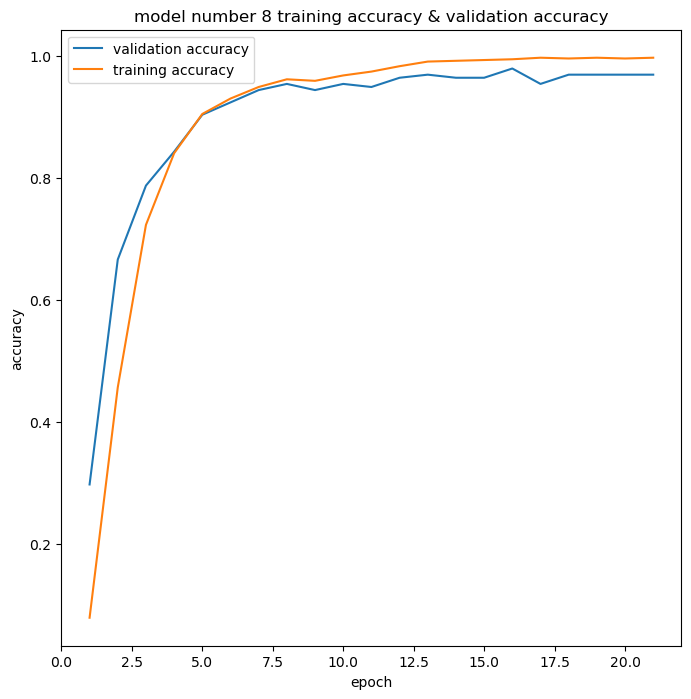

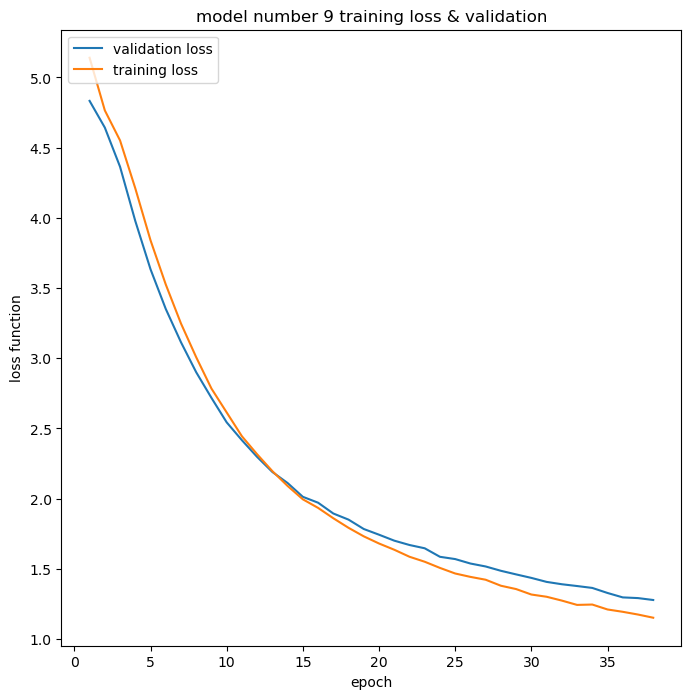

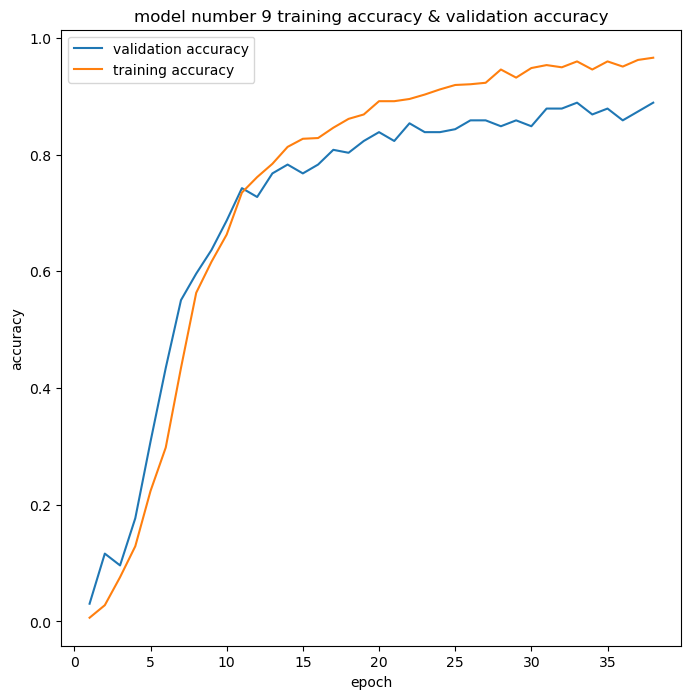

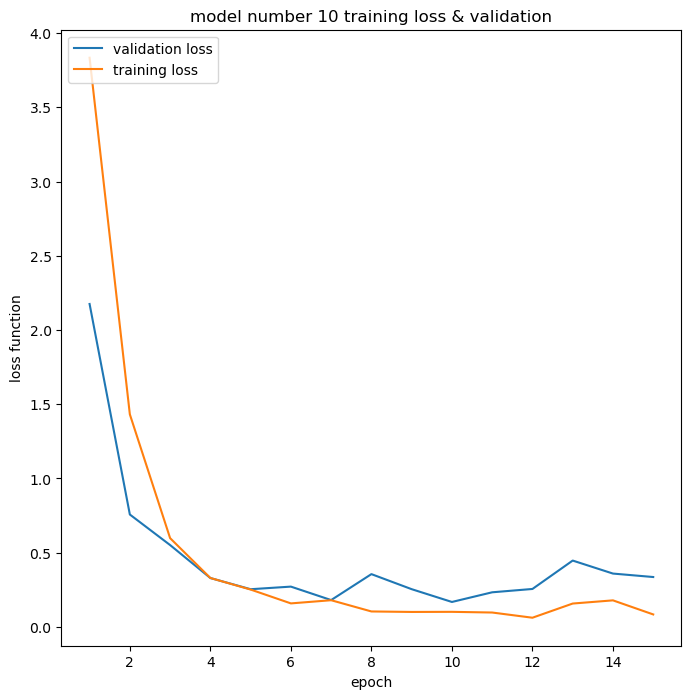

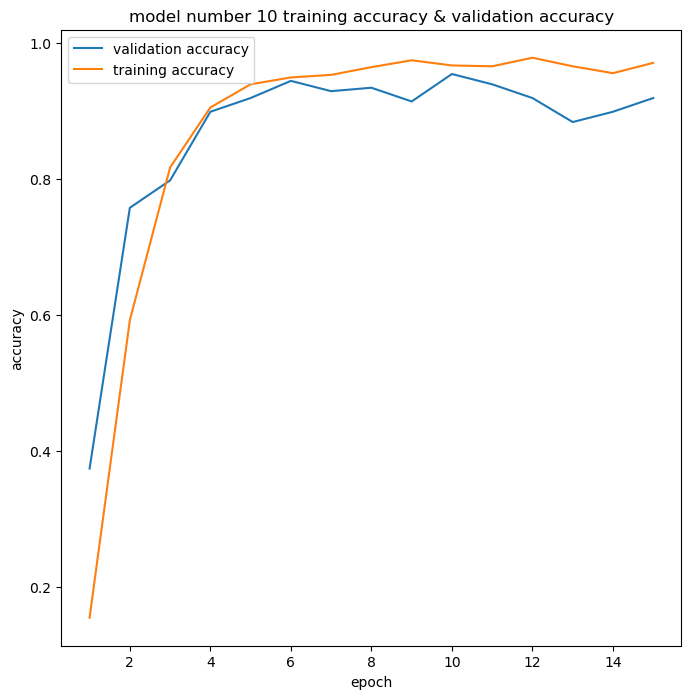

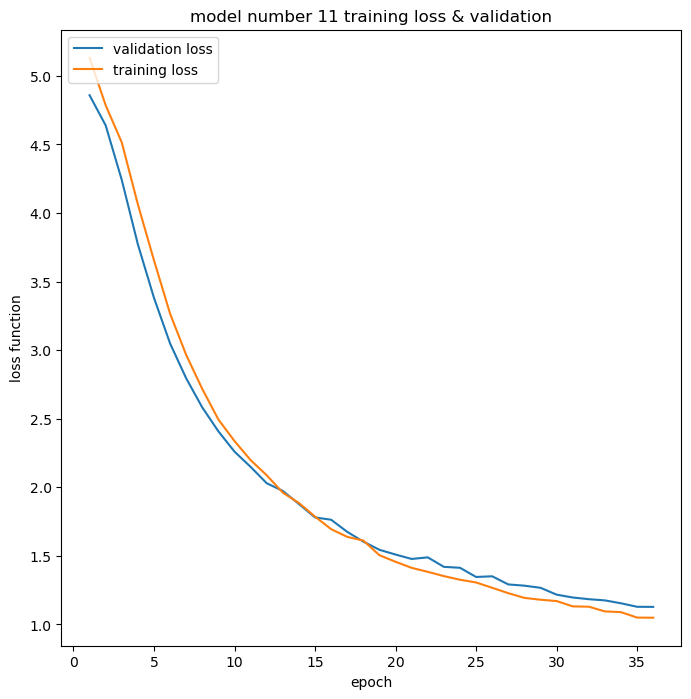

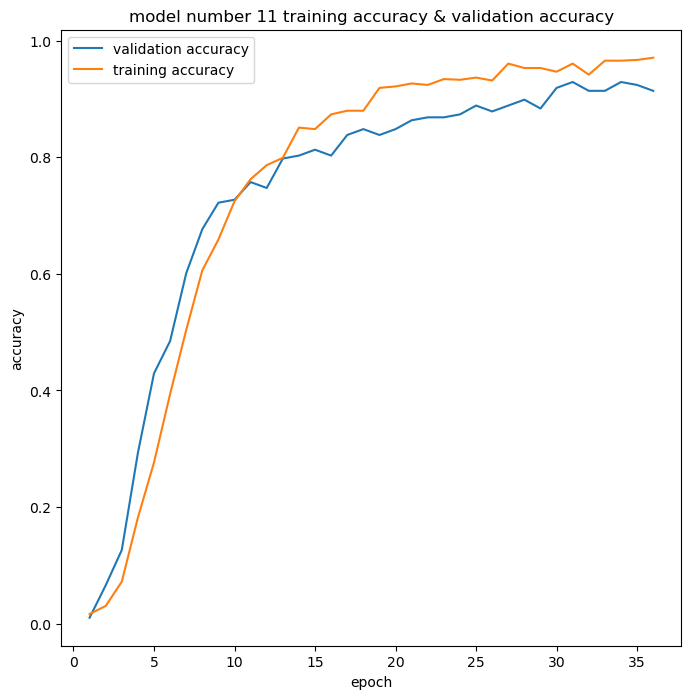

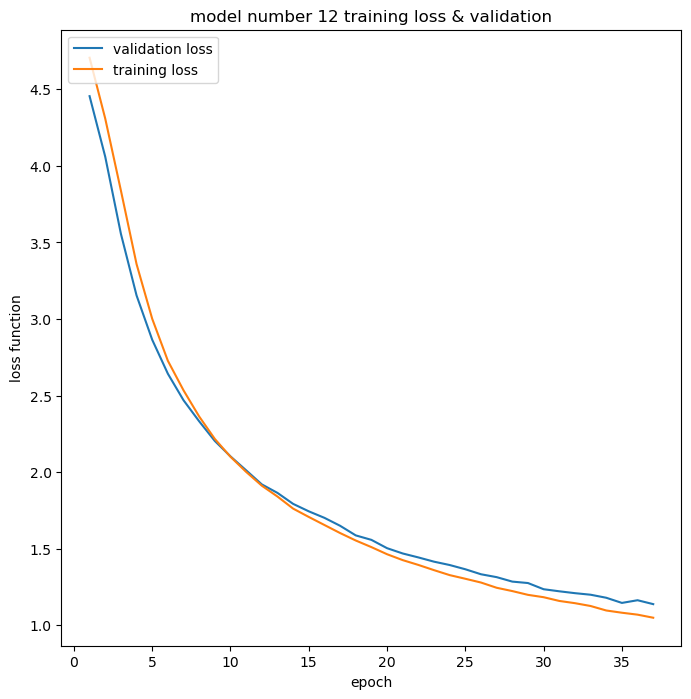

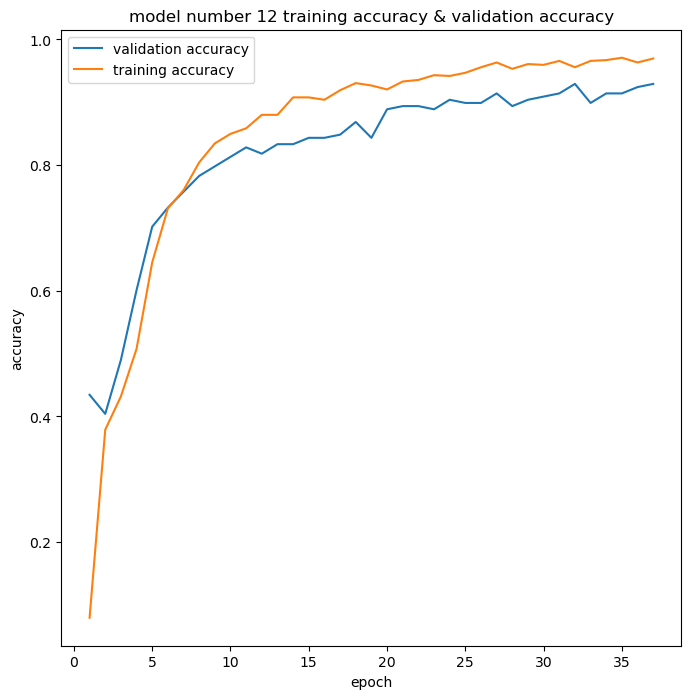

7/7 [==============================] - 0s 9ms/step - loss: 1.1372 - accuracy: 0.9293


In [36]:
models = createBest_12Models(best_hps)
train_all_models(models)
avg_training_loss_1, avg_validation_loss_1, avg_training_accuracy_1, avg_validation_accuracy_1 = evaluate_model(models,X_train,X_val,y_train,y_val)